In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/home/hnguyen/cloth_smoothing/equiRL/data/equi/video/demo.csv')
data.describe()

,Length,NUM_FLING
count,1000.000000,1000.000000
mean,107.559000,2.237000
std,31.158681,0.622269
min,39.000000,1.000000
25%,91.000000,2.000000
50%,100.000000,2.000000
75%,136.000000,3.000000
max,178.000000,3.000000


In [3]:
# load columns NPY_path
path = data['NPY_Path']
path

0      /home/hnguyen/cloth_smoothing/equiRL/data/equi...
1      /home/hnguyen/cloth_smoothing/equiRL/data/equi...
2      /home/hnguyen/cloth_smoothing/equiRL/data/equi...
3      /home/hnguyen/cloth_smoothing/equiRL/data/equi...
4      /home/hnguyen/cloth_smoothing/equiRL/data/equi...
                             ...                        
995    /home/hnguyen/cloth_smoothing/equiRL/data/equi...
996    /home/hnguyen/cloth_smoothing/equiRL/data/equi...
997    /home/hnguyen/cloth_smoothing/equiRL/data/equi...
998    /home/hnguyen/cloth_smoothing/equiRL/data/equi...
999    /home/hnguyen/cloth_smoothing/equiRL/data/equi...
Name: NPY_Path, Length: 1000, dtype: object

In [4]:
npy_data = np.load(path[0], allow_pickle=True)
npy_data

/home/hnguyen/miniconda3/envs/softgym/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([[tensor([[[[216, 216, 216,  ..., 246, 246, 246],
                  [216, 216, 216,  ..., 246, 246, 246],
                  [216, 216, 216,  ..., 246, 246, 246],
                  ...,
                  [246, 246, 246,  ..., 216, 216, 216],
                  [246, 246, 246,  ..., 216, 216, 216],
                  [246, 246, 246,  ..., 216, 216, 216]],

                 [[213, 213, 213,  ..., 243, 243, 243],
                  [213, 213, 213,  ..., 243, 243, 243],
                  [213, 213, 213,  ..., 243, 243, 243],
                  ...,
                  [243, 243, 243,  ..., 213, 213, 213],
                  [243, 243, 243,  ..., 213, 213, 213],
                  [243, 243, 243,  ..., 213, 213, 213]],

                 [[213, 213, 213,  ..., 243, 243, 243],
                  [213, 213, 213,  ..., 243, 243, 243],
                  [213, 213, 213,  ..., 243, 243, 243],
                  ...,
                  [243, 243, 243,  ..., 213, 213, 213],
                  [243, 243, 24

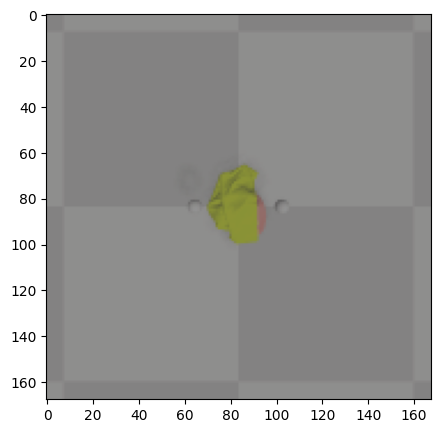

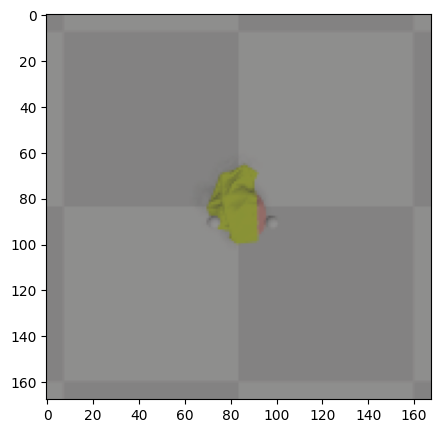

In [5]:
from torchvision import transforms
from byol import RandomGrayScaleRGBD, RandomColorJitterRGBD, RandomChangeBackgroundRGBD
import torch
from matplotlib import pyplot as plt
obses = []
for i in range(len(npy_data)):
    data = npy_data[i][0]
    obses.append(data)

obses = torch.stack(obses, dim=0)
obses = obses.view(-1, 4, 168, 168)

aug = transforms.Compose([
    RandomChangeBackgroundRGBD(p=0.5),
    RandomColorJitterRGBD(p=1.0),
    RandomGrayScaleRGBD(p=0.2),
])
aug_obses = aug(obses)

for i in range(2):
    obs_rgb_masked = aug_obses[i, :3, :, :]
    plt.figure(figsize=(5, 5))
    plt.imshow(obs_rgb_masked.permute(1, 2, 0).numpy())

In [6]:
import numpy as np
array = np.array([-0.5, 0, 0, 0, 0.5, 0, 0, 0])
array

array([-0.5,  0. ,  0. ,  0. ,  0.5,  0. ,  0. ,  0. ])

In [7]:
from matplotlib import pyplot as plt

def plot_rgb_and_gray_images(tensor, k):
    # Extract the RGB images from the first column [:3, 168, 168]
    rgb_images = tensor[:3]
    # Extract the grayscale images from the second column [3, 168, 168]
    gray_images = tensor[3]
    # Plot RGB images in the first column
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(rgb_images.permute(1, 2, 0).cpu().numpy())
    plt.title("RGB Image")
    plt.axis('off')
    # Plot grayscale images in the second column
    plt.subplot(1, 2, 2)
    plt.imshow(gray_images.cpu().numpy(), cmap='gray')
    plt.title("Gray Image")
    plt.axis('off')
    plt.savefig(f'{k}.png')
    plt.close()

In [8]:
obs = aug_obses[0, ...]
next_obs = aug_obses[1, ...]

print(obs.shape)
print(obs.shape)

torch.Size([4, 168, 168])
torch.Size([4, 168, 168])


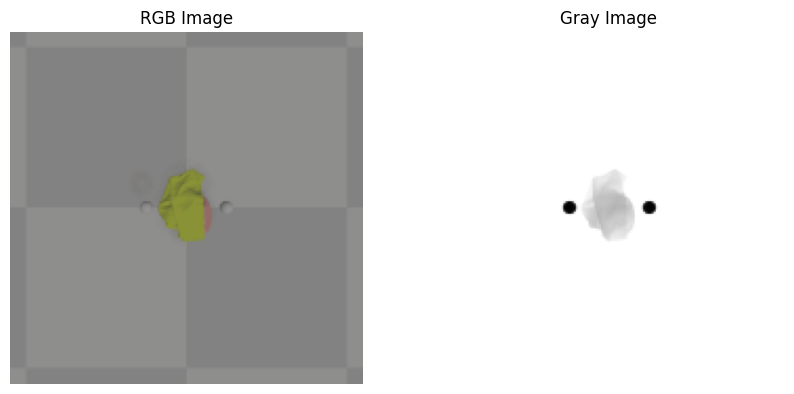

In [9]:
plot_rgb_and_gray_images(obs)

In [10]:
from utils import perturb

In [11]:
dxy = array[::2].copy()
dxy1, dxy2 = np.split(dxy, 2)

obs_n, next_obs_n, dxy1, dxy2, _ = perturb(obs.numpy().copy(),
                                           next_obs.numpy().copy(),
                                           dxy1,
                                           dxy2,
                                           set_trans_zero=True)
obs_n = torch.from_numpy(obs_n)
next_obs_n = torch.from_numpy(next_obs_n)



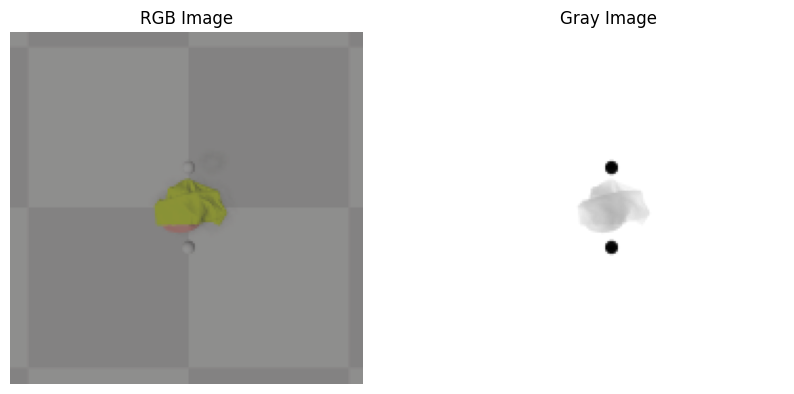

In [12]:
plot_rgb_and_gray_images(obs_n)

In [13]:
# plot_rgb_and_gray_images(next_obs_n)

[-3.061617e-17 -5.000000e-01]
[3.061617e-17 5.000000e-01]


In [15]:
a = np.random.uniform(-1, 1)
a

0.6082065798997629

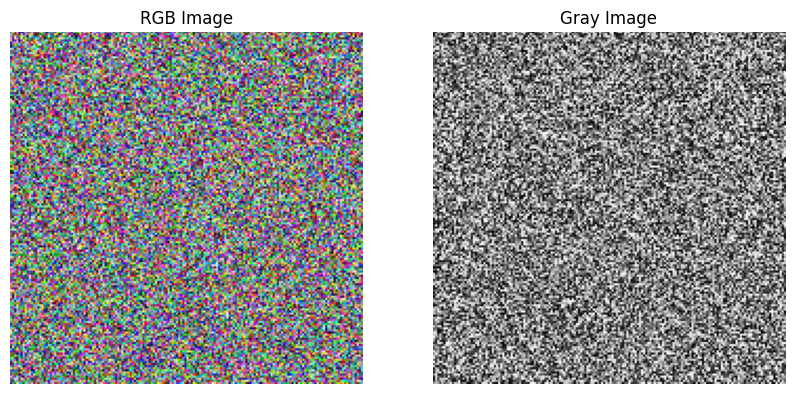

In [4]:
import torch
import matplotlib.pyplot as plt

def plot_rgb_and_gray_images(tensor, name):
    if tensor.ndim == 4:
        tensor = tensor.squeeze(0)
    assert tensor.ndim == 3
    rgb_images = tensor[:3]
    gray_images = tensor[3]
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(rgb_images.permute(1, 2, 0).cpu().numpy())
    axes[0].set_title("RGB Image")
    axes[0].axis('off')
    axes[1].imshow(gray_images.cpu().numpy(), cmap='gray')
    axes[1].set_title("Gray Image")
    axes[1].axis('off')
    # plt.savefig(f'vis/image_{name}.png')
    # plt.close(fig)
    plt.show(fig)

img = torch.randint(0, 255, (1, 4, 168, 168))
plot_rgb_and_gray_images(img, 'test')

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
x1 = [i for i in range(100)]
y1 = [x*2 for x in x1]

x2 = [i for i in range(0, 100, 5)]
y2 = [x+10 for x in x2]


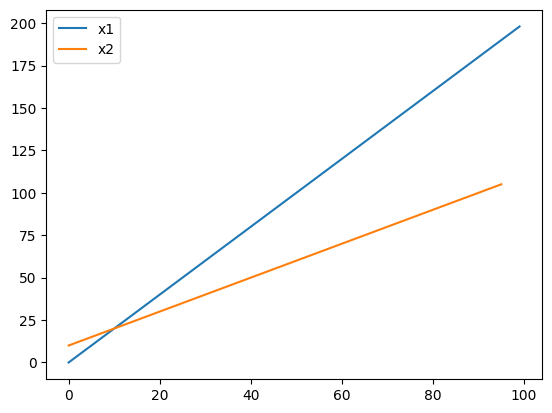

In [13]:
# plot (x1, y1) and (x2, y2)
plt.plot(x1, y1, label='x1')
plt.plot(x2, y2, label='x2')
plt.legend()
plt.show()

In [6]:
import torch
import torch.nn as nn
input_tensor = torch.tensor([[0, 1], [1, 0], [0, 0], [1, 1]])
vocab_size = 2  # The number of unique indices in your input tensor (0 and 1 in this case)
embedding_dim = 2  # The dimension of each embedding vector
embedding_layer = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)
embeddings = embedding_layer(input_tensor)
print(embeddings)

tensor([[[-0.4078,  0.9086],
         [-2.0068,  1.3792]],

        [[-2.0068,  1.3792],
         [-0.4078,  0.9086]],

        [[-0.4078,  0.9086],
         [-0.4078,  0.9086]],

        [[-2.0068,  1.3792],
         [-2.0068,  1.3792]]], grad_fn=<EmbeddingBackward>)


In [9]:
import torch

# Define your input tensor with shape [batch, seq_len, 2]
input_tensor = torch.tensor([[[0, 0], [0, 1], [1, 0], [1, 1]],  # Example batch 1
                             [[1, 0], [0, 1], [0, 0], [1, 1]]])  # Example batch 2
print(input_tensor)
print(input_tensor.shape)
# Compute the desired output tensor
desired_output = torch.eye(4)[input_tensor.sum(dim=2)]

# The output tensor will have the desired values
print(desired_output)
print(desired_output.shape)

tensor([[[0, 0],
         [0, 1],
         [1, 0],
         [1, 1]],

        [[1, 0],
         [0, 1],
         [0, 0],
         [1, 1]]])
torch.Size([2, 4, 2])
tensor([[[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.]],

        [[0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [1., 0., 0., 0.],
         [0., 0., 1., 0.]]])
torch.Size([2, 4, 4])


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define a simple MLP model
class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define hyperparameters
input_size = 2  # Change this based on your input features
hidden_size = 128
output_size = 1

learning_rate = 0.001
num_epochs = 100

# Create a toy dataset (replace with your own dataset)
X_train = torch.randn(100, input_size)
y_train = torch.randint(low=0, high=2, size=(100, 1)).float()  # Binary labels: 0 or 1

# Create DataLoader for training data
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Initialize the model, loss function, and optimizer
model = MLPClassifier(input_size, hidden_size, output_size)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for batch_X, batch_y in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_X)
        
        # Compute the loss
        loss = criterion(outputs, batch_y)
        
        # Backpropagation and optimization
        loss.backward()
        optimizer.step()
    
    # Print the loss for monitoring
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Prediction
X_test = torch.randn(10, input_size)  # Replace with your test data
with torch.no_grad():
    model.eval()  # Set the model to evaluation mode
    predicted_scores = model(X_test)
    predicted_labels = torch.sign(predicted_scores)  # Convert scores to binary predictions (1 or -1)

# Print the predicted labels
print("Predicted Labels:")
print(predicted_labels)


Epoch [1/100], Loss: 0.6575843691825867
Epoch [2/100], Loss: 0.629416286945343
Epoch [3/100], Loss: 0.5143190622329712
Epoch [4/100], Loss: 0.5653612613677979
Epoch [5/100], Loss: 0.7031310796737671
Epoch [6/100], Loss: 0.7719241380691528
Epoch [7/100], Loss: 0.7153688669204712
Epoch [8/100], Loss: 0.6965334415435791
Epoch [9/100], Loss: 0.8486446142196655
Epoch [10/100], Loss: 0.6276544332504272
Epoch [11/100], Loss: 0.7879204154014587
Epoch [12/100], Loss: 0.5868988633155823
Epoch [13/100], Loss: 0.6717236638069153
Epoch [14/100], Loss: 0.6648499965667725
Epoch [15/100], Loss: 0.45862042903900146
Epoch [16/100], Loss: 0.561255156993866
Epoch [17/100], Loss: 0.7224715352058411
Epoch [18/100], Loss: 0.6404812335968018
Epoch [19/100], Loss: 0.529417097568512
Epoch [20/100], Loss: 0.5367611646652222
Epoch [21/100], Loss: 0.9844796657562256
Epoch [22/100], Loss: 0.8875573873519897
Epoch [23/100], Loss: 0.6113631129264832
Epoch [24/100], Loss: 0.6715501546859741
Epoch [25/100], Loss: 0.623

In [5]:
import torch

pp = torch.randint(0, 2, (3, 4, 2))
print(pp)
pp_code = torch.zeros(3, 4)
for i in range(3):
    for j in range (4):
        if pp[i, j][0] == 0 and pp[i, j][1] == 0:
            pp_code[i, j] = 0
        elif pp[i, j][0] == 0 and pp[i, j][1] == 1:
            pp_code[i, j] = 1
        elif pp[i, j][0] == 1 and pp[i, j][1] == 0:
            pp_code[i, j] = 2
        elif pp[i, j][0] == 1 and pp[i, j][1] == 1:
            pp_code[i, j] = 3
print(pp_code.unsqueeze(-1))

tensor([[[1, 0],
         [0, 1],
         [1, 1],
         [1, 1]],

        [[1, 0],
         [0, 1],
         [1, 0],
         [0, 0]],

        [[1, 0],
         [1, 1],
         [0, 0],
         [0, 0]]])
tensor([[[2.],
         [1.],
         [3.],
         [3.]],

        [[2.],
         [1.],
         [2.],
         [0.]],

        [[2.],
         [3.],
         [0.],
         [0.]]])


In [3]:
# code pp [0, 0] -> 0, [0, 1] -> 1, [1, 0] -> 2, [1, 1] -> 3
pp_code = torch.zeros(3, 5)
for i in range(3):
    for j in range (5):
        if pp[i, j][0] == 0 and pp[i, j][1] == 0:
            pp_code[i, j] = 0
        elif pp[i, j][0] == 0 and pp[i, j][1] == 1:
            pp_code[i, j] = 1
        elif pp[i, j][0] == 1 and pp[i, j][1] == 0:
            pp_code[i, j] = 2
        elif pp[i, j][0] == 1 and pp[i, j][1] == 1:
            pp_code[i, j] = 3

pp_code

tensor([[2., 3., 1., 1., 2.],
        [3., 0., 2., 0., 2.],
        [0., 0., 0., 2., 3.]])

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Step 2: Prepare your data
# You need to have your training data in the form of PyTorch tensors.
# For example, you can use random data for demonstration purposes:

# Generate random data
np.random.seed(42)
X_train = np.random.rand(100, 2)  # 100 samples with 2 features
y_train = np.random.choice([-1, 1], size=(100,))  # Binary labels as -1 or 1

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

# Step 3: Define the neural network model
class BinaryClassifier(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return self.fc(x)

# Step 4: Define the BCE with logits loss function
criterion = nn.BCEWithLogitsLoss()

# Step 5: Set up the optimizer
model = BinaryClassifier(input_dim=2)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Step 6: Train the model
num_epochs = 1000

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    
    # Calculate the loss
    loss = criterion(outputs.view(-1), (y_train + 1) / 2)  # Convert labels from -1/1 to 0/1
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Test the model on new data
X_test = torch.tensor([[0.1, -0.3]], dtype=torch.float32)
logits = model(X_test).item()
predicted_class = 1 if logits > 0 else -1

print(f'Logits: {logits:.4f}, Predicted class: {predicted_class}')


/home/hnguyen/miniconda3/envs/softgym/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch [100/1000], Loss: 0.6878
Epoch [200/1000], Loss: 0.6875
Epoch [300/1000], Loss: 0.6872
Epoch [400/1000], Loss: 0.6870
Epoch [500/1000], Loss: 0.6868
Epoch [600/1000], Loss: 0.6867
Epoch [700/1000], Loss: 0.6865
Epoch [800/1000], Loss: 0.6864
Epoch [900/1000], Loss: 0.6862
Epoch [1000/1000], Loss: 0.6861
Logits: 0.2161, Predicted class: 1


In [9]:
import torch
import torch.nn as nn

# Define your embedding layer
embedding_dim = 32  # You can choose the dimensionality of your embeddings
embedding_layer = nn.Embedding(2, embedding_dim)  # 2 is the number of unique values (1 and -1)

# Your input tensor
input_tensor_1 = torch.tensor([-1])  # Replace 1 with -1 if needed
input_tensor_minus_1 = torch.tensor([1])  # Replace -1 with 1 if needed
# Apply the embedding layer
embedded_vector = embedding_layer(input_tensor)
embedded_vector_minus_1 = embedding_layer(input_tensor_minus_1)
print(embedded_vector)
print(embedded_vector_minus_1)


tensor([[ 0.1869, -0.4445,  1.2819,  0.9795,  0.2905,  0.2281, -0.3060,  0.1962,
          1.1051,  0.0847, -2.6173, -0.2488,  0.7172, -0.8725, -1.5569, -1.7385,
          1.1317,  0.6649,  1.2035, -1.0662,  0.5307, -0.9129,  0.6042, -1.8707,
          1.2342, -0.9441,  0.6667,  0.4626,  1.0897, -0.6035,  0.1420, -0.7200]],
       grad_fn=<EmbeddingBackward>)
tensor([[ 0.1869, -0.4445,  1.2819,  0.9795,  0.2905,  0.2281, -0.3060,  0.1962,
          1.1051,  0.0847, -2.6173, -0.2488,  0.7172, -0.8725, -1.5569, -1.7385,
          1.1317,  0.6649,  1.2035, -1.0662,  0.5307, -0.9129,  0.6042, -1.8707,
          1.2342, -0.9441,  0.6667,  0.4626,  1.0897, -0.6035,  0.1420, -0.7200]],
       grad_fn=<EmbeddingBackward>)


In [5]:
import numpy as np
import math
a = np.random.rand(3, 4) * 243
print(a)
b = np.round(a, 2)
print(b)

[[155.24761105 101.90770794  77.82277029 172.73565101]
 [223.80586846 163.32383126 212.16818823 144.20762287]
 [ 28.99895321 124.58091124  99.10021784 154.38044911]]
[[155.25 101.91  77.82 172.74]
 [223.81 163.32 212.17 144.21]
 [ 29.   124.58  99.1  154.38]]


In [2]:
import torch
import numpy as np
import pandas as pd

df = pd.read_csv('/home/hnguyen/cloth_smoothing/equiRL/data/equi/video/demo.csv')
df.head()

,Length,Final_step,NPY_Path,NUM_FLING
0,77,"[5, 14, 36, 44, 55, 76]",/home/hnguyen/cloth_smoothing/equiRL/data/equi...,2
1,62,"[7, 34, 61]",/home/hnguyen/cloth_smoothing/equiRL/data/equi...,1
2,86,"[7, 19, 44, 52, 63, 85]",/home/hnguyen/cloth_smoothing/equiRL/data/equi...,2
3,158,"[8, 25, 53, 57, 77, 105, 118, 135, 157]",/home/hnguyen/cloth_smoothing/equiRL/data/equi...,3
4,78,"[5, 14, 36, 42, 55, 77]",/home/hnguyen/cloth_smoothing/equiRL/data/equi...,2


In [5]:
# take the column name NPY_Path
new_df = df['NPY_Path'].values
path = new_df[0]
path


'/home/hnguyen/cloth_smoothing/equiRL/data/equi/video/demo_npy/data_1.npy'

In [8]:
# load npy file
data = np.load(path, allow_pickle=True)
obs = []
for i in range(len(data)):
    obs.append(data[i][0].squeeze(0))
obs = torch.stack(obs, dim=0)
print(obs.shape)

torch.Size([76, 4, 168, 168])


In [10]:
# visualize a sequence tensor shape [N, 3, 168, 168] as a video
import cv2
import numpy as np
from IPython.display import HTML

# Define the output video file name and parameters
output_filename = 'output_video.mp4'
frame_rate = 30  # Frames per second
codec = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 format

# Get the shape of the array
N, _, height, width = obs.shape

# Initialize the VideoWriter object
out = cv2.VideoWriter(output_filename, codec, frame_rate, (width, height))

# Iterate through each frame and write it to the video
for i in range(N):
    frame = obs[i, :3, ...].numpy().transpose(1, 2, 0)  # Transpose the frame from (3, 168, 168) to (168, 168, 3)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    out.write(frame)

# Release the VideoWriter object
out.release()
print(f"Video saved as {output_filename}")

# Display the video in the notebook using the HTML5 video tag
video_html = f"""
<video width="{width}" height="{height}" controls>
  <source src="{output_filename}" type="video/mp4">
  Your browser does not support the video tag.
</video>
"""

HTML(video_html)


Video saved as output_video.mp4


OpenCV: FFMPEG: tag 0x64697678/'xvid' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
